<a href="https://colab.research.google.com/github/mariacmartins/bioinformatica-disciplina/blob/main/Aula_13_(R)_RNA_Seq_express%C3%A3o_diferencial_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expressão diferencial

A **expressão gênica diferencial** pode ser compreendida como o perfil de expressão gênica de um determinado organismo que pode ser alterado a quando submetido a uma determinada condição. 

Podemos identificar genes com **expressão aumentada (up-regulated)** ou **diminuída (down-regulated)** e posteriormente, também podemos mapear processos biológicos que estão sendo modulados em resposta às mudanças na qual o organismo se encontra.


In [3]:
if (!requireNamespace("BiocManager"))
  install.packages("BiocManager")
BiocManager::install()

Loading required namespace: BiocManager

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.15), R 4.1.0 (2021-05-18)

Installing package(s) 'BiocVersion'

Old packages: 'devtools', 'openssl', 'remotes', 'rversions', 'Matrix', 'mgcv'



In [4]:
BiocManager::install(c("edgeR"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.15), R 4.1.0 (2021-05-18)

Installing package(s) 'edgeR'

also installing the dependencies ‘limma’, ‘locfit’


Old packages: 'devtools', 'openssl', 'remotes', 'rversions', 'Matrix', 'mgcv'



In [5]:
library(edgeR)

Loading required package: limma



In [6]:
rawCountTable <- read.table("merged.csv", header=TRUE, row.names=1, sep=",")
sampleInfo <- read.table("samples.csv", header=TRUE, row.names=1, sep=",")

dgList <- DGEList(rawCountTable, group=sampleInfo$group)
dgList

,SRR1071264,SRR1071263,SRR1071262,SRR1071261,SRR1071260,SRR1071259
LIC_10001,47,80,20,25,41,38
LIC_10002,72,130,72,98,94,85
LIC_10003,9,21,8,33,40,21
LIC_10004,4,17,3,19,16,12
LIC_10005,149,214,62,173,207,136
LIC_10006,178,221,64,196,254,160
LIC_10007,35,60,9,46,57,43
LIC_10008,11,7,2,9,8,10
LIC_10009,10,47,27,54,31,28
LIC_10010,11,35,7,20,12,26


In [8]:
countsPerMillion <- cpm(dgList)

summary(countsPerMillion)

   SRR1071264         SRR1071263         SRR1071262         SRR1071261      
 Min.   :     0.0   Min.   :     0.0   Min.   :     0.0   Min.   :     0.0  
 1st Qu.:     0.7   1st Qu.:     1.1   1st Qu.:     0.6   1st Qu.:     1.0  
 Median :     1.9   Median :     3.0   Median :     1.6   Median :     2.7  
 Mean   :   273.0   Mean   :   273.0   Mean   :   273.0   Mean   :   273.0  
 3rd Qu.:     5.0   3rd Qu.:     7.6   3rd Qu.:     4.0   3rd Qu.:     7.1  
 Max.   :918423.8   Max.   :896332.4   Max.   :911919.7   Max.   :903746.0  
   SRR1071260         SRR1071259      
 Min.   :     0.0   Min.   :     0.0  
 1st Qu.:     0.9   1st Qu.:     1.1  
 Median :     2.5   Median :     3.0  
 Mean   :   273.0   Mean   :   273.0  
 3rd Qu.:     6.6   3rd Qu.:     7.7  
 Max.   :910807.3   Max.   :903316.6  

In [9]:
dgList <- calcNormFactors(dgList, method="TMM")

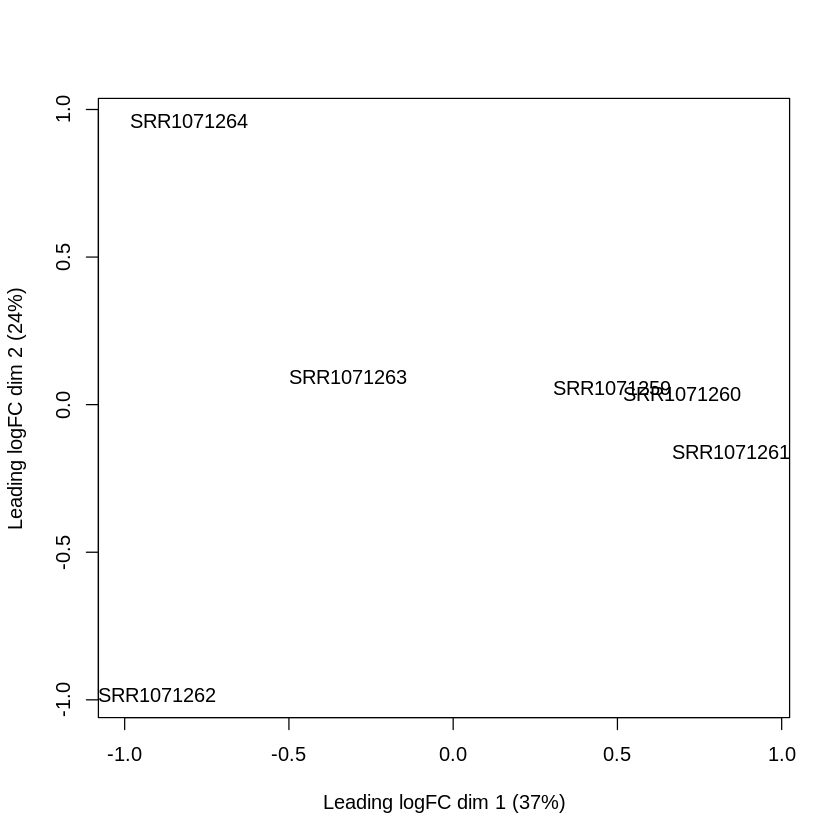

In [10]:
plotMDS(dgList)

In [11]:
sampleType <- as.factor(dgList$samples$group)
sampleReplicates <- paste("S", rep(1:3, each=2), sep="")
designMat <- model.matrix(~sampleReplicates + sampleType)
designMat

,(Intercept),sampleReplicatesS2,sampleReplicatesS3,sampleTypeTREATMENT
1,1,0,0,1
2,1,0,0,1
3,1,1,0,1
4,1,1,0,0
5,1,0,1,0
6,1,0,1,0


In [12]:
dgList <- estimateGLMCommonDisp(dgList, design=designMat)
dgList <- estimateGLMTrendedDisp(dgList, design=designMat)
dgList <- estimateGLMTagwiseDisp(dgList, design=designMat)

In [14]:
fit <- glmFit(dgList, designMat)
lrt <- glmLRT(fit, coef=4)

In [16]:
deGenes <- decideTestsDGE(lrt, p=0.01)
deGenes <- rownames(lrt)[as.logical(deGenes)]
deGenes

[1] "LIC_10159"    "LIC_10175"    "LIC_10296"    "LIC_10297"    "LIC_10298"   
 [6] "LIC_10299"    "LIC_10373"    "LIC_10415"    "LIC_10462"    "LIC_10464"   
[11] "LIC_10465"    "LIC_10524"    "LIC_10525"    "LIC_10600"    "LIC_11059"   
[16] "LIC_11082"    "LIC_11219"    "LIC_11301"    "LIC_11335"    "LIC_11336"   
[21] "LIC_11889"    "LIC_12077"    "LIC_12099"    "LIC_12209"    "LIC_12210"   
[26] "LIC_12211"    "LIC_12297"    "LIC_12298"    "LIC_12555"    "LIC_12604"   
[31] "LIC_12614"    "LIC_12615"    "LIC_12631"    "LIC_12692"    "LIC_12737"   
[36] "LIC_13066"    "LIC_13166"    "LIC_13198"    "LIC_13390"    "__no_feature"

In [17]:
toptags = topTags(lrt, n=5000)

In [18]:
toptags <- as.data.frame(toptags)
toptags

,logFC,logCPM,LR,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
__no_feature,0.7667687,16.0494925,69.08099,9.450209e-17,3.461611e-13
LIC_12211,4.4438569,7.2203152,64.27099,1.084308e-15,1.985909e-12
LIC_12077,5.7421572,2.4290887,59.88710,1.004578e-14,1.226590e-11
LIC_12210,4.1206355,7.8411144,58.74707,1.793005e-14,1.641945e-11
LIC_12099,5.0164667,3.9259203,56.19995,6.546318e-14,4.795833e-11
LIC_11335,3.4643538,7.6192790,43.01055,5.444556e-11,3.323902e-08
LIC_11059,4.2533061,2.2241764,39.71627,2.936689e-10,1.536727e-07
LIC_10524,2.9482322,8.2230112,39.00678,4.223357e-10,1.933770e-07
LIC_12631,3.6623685,5.7906180,38.58721,5.236097e-10,2.131091e-07


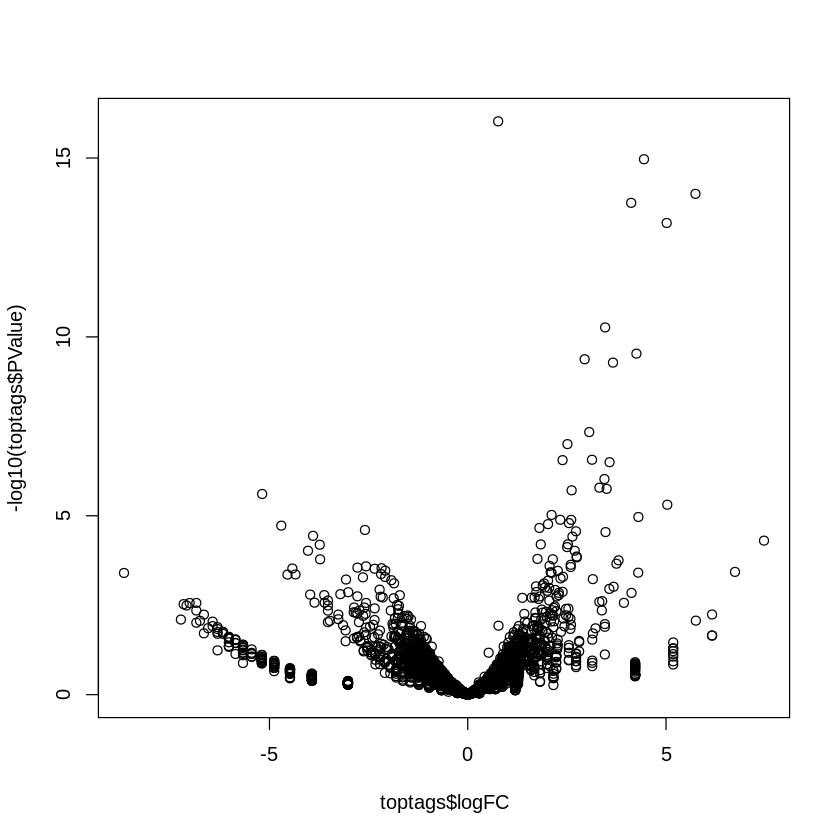

In [19]:
plot(toptags$logFC, -log10(toptags$PValue))

In [21]:
toptags_degs_up = toptags[toptags$PValue < 0.05 & toptags$logFC > 2,]
toptags_degs_down = toptags[toptags$PValue < 0.05 & toptags$logFC < -2,]

In [24]:
nrow(toptags_degs_up)

[1] 106

In [25]:
nrow(toptags_degs_down)

[1] 116

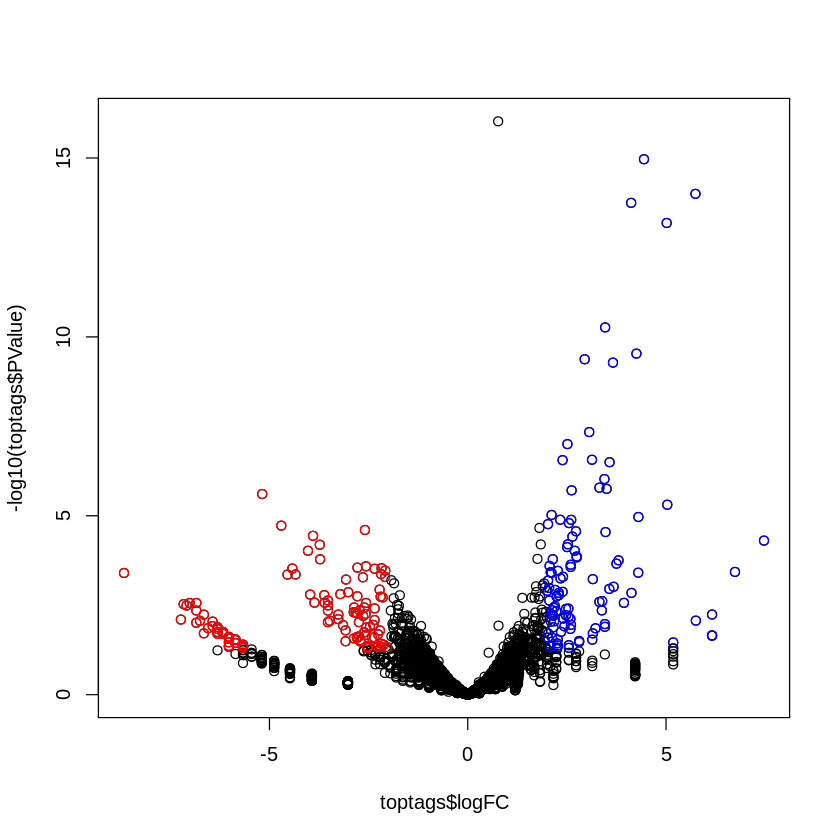

In [23]:
plot(toptags$logFC, -log10(toptags$PValue))
points(toptags_degs_up$logFC, -log10(toptags_degs_up$PValue), col="blue")
points(toptags_degs_down$logFC, -log10(toptags_degs_down$PValue), col="red")

In [26]:
write.csv(toptags, "expression.csv")